## B.1 Importar librerías

In [ ]:
%matplotlib notebook

import numpy as np
import matplotlib.pylab as plt

import pickle
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# Implemetación de k-medianas basado en scikit-learn
# https://gist.github.com/mblondel/1451300
class KMedians(KMeans):
    def _e_step(self, X):
        self.labels_ = manhattan_distances(X, self.cluster_centers_).argmin(axis=1)

    def _average(self, X):
        return np.median(X, axis=0)

## B.2 Importar dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
world_data, world_labels, world_labels_short, feature_name = pickle.load(open("world.p", "rb"))
N, M = world_data.shape
print("Nombres de paises y sus abreviaturas:")
I = np.argsort(world_labels_short)
print(np.concatenate((np.asarray(world_labels_short)[I, np.newaxis], 
                      np.asarray(world_labels)[I, np.newaxis]), axis=1))

Nombres de paises y sus abreviaturas:
[['ARG' 'Argentina']
 ['AUS' 'Australia']
 ['AUT' 'Austria']
 ['BEL' 'Belgium']
 ['BGR' 'Bulgaria']
 ['BOL' 'Bolivia']
 ['BRA' 'Brazil']
 ['CAN' 'Canada']
 ['CHE' 'Switzerland']
 ['CHL' 'Chile']
 ['CHN' 'China']
 ['COL' 'Colombia']
 ['CRI' 'Costa Rica']
 ['DEU' 'Germany']
 ['DNK' 'Denmark']
 ['ECU' 'Ecuador']
 ['ESP' 'Spain']
 ['ETH' 'Ethiopia']
 ['FRA' 'France']
 ['GBR' 'United Kingdom']
 ['GRC' 'Greece']
 ['GTM' 'Guatemala']
 ['HRV' 'Croatia']
 ['HUN' 'Hungary']
 ['IND' 'India']
 ['IRL' 'Ireland']
 ['IRQ' 'Iraq']
 ['ITA' 'Italy']
 ['JPN' 'Japan']
 ['KEN' 'Kenya']
 ['LTU' 'Lithuania']
 ['LUX' 'Luxembourg']
 ['LVA' 'Latvia']
 ['MAR' 'Morocco']
 ['MDA' 'Moldova']
 ['MEX' 'Mexico']
 ['MYS' 'Malaysia']
 ['NGA' 'Nigeria']
 ['NLD' 'Netherlands']
 ['NZL' 'New Zealand']
 ['PAK' 'Pakistan']
 ['PAN' 'Panama']
 ['PHL' 'Philippines']
 ['POL' 'Poland']
 ['PRT' 'Portugal']
 ['ROM' 'Romania']
 ['RUS' 'Russian Federation']
 ['SLV' 'El Salvador']
 ['SRB' 'Serbia']

## B.3 Seleccionar subset de características

Descomente y comente las lineas que correspondan

In [ ]:
# Parte 1: Según geografía y población
#subset = [0, 1, 2, 3]
# Parte 2: Según desarrollo económico
#subset = [4, 5, 6, 7]
# Parte 3: Según desarrollo tecnológico
#subset = [8, 9, 10, 11, 12, 13]
# Parte 4: Según calidad de vida y educación
#subset = [15, 16, 17, 18, 19, 20]
# Parte 5: Todas
subset = np.arange(M)

# Normalizar datos
world_data_scaled = scale(world_data[:, subset], axis=0, with_mean=False, with_std=True)

## B.4 Clustering usando kmedians

El parámetro n_clusters modifica el número de clusters

In [ ]:
clustering = KMedians(n_clusters=5)
pred_labels = clustering.fit_predict(world_data_scaled)
print("Suma de errores cuadráticos: %f" %(clustering.inertia_))

Suma de errores cuadráticos: 580.760264


## B.5 Proyección con PCA

El parámetro n_componentes modifica la cantidad de componentes principales que se extraen de los datos

Varianza explicada por los primeros componentes principales:
[0.3629233  0.13102381]
Suma acumulada de los primeros componentes principales: 0.493947


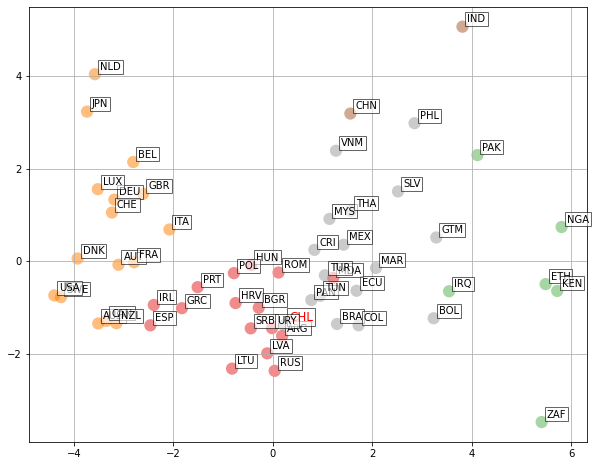

In [ ]:
pca = PCA(n_components=2)
world_data_projected = pca.fit_transform(world_data_scaled)
print("Varianza explicada por los primeros componentes principales:")
print(pca.explained_variance_ratio_)
print("Suma acumulada de los primeros componentes principales: %f" % np.sum(pca.explained_variance_ratio_))
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(world_data_projected[:, 0], world_data_projected[:, 1], 
           c=pred_labels/clustering.n_clusters, linewidth=0, alpha=0.5, s=150, cmap='Set1')
for i in range(N):
    if world_labels_short[i] == "CHL":
        ax.annotate(world_labels_short[i], 
                    xy=(world_data_projected[i, 0]+0.1, world_data_projected[i, 1]+0.1), fontsize=12, color='r',
                   bbox={'facecolor':'white', 'alpha':0.6, 'pad':2})
    else:
        ax.annotate(world_labels_short[i], 
                    xy=(world_data_projected[i, 0]+0.1, world_data_projected[i, 1]+0.1), fontsize=10,
                   bbox={'facecolor':'white', 'alpha':0.6, 'pad':2})
plt.grid()

## B.6 SOM

- Para los criterios de agrupación (a), (b), (c) y (d) use los datos normalizados
- Para el criterio de agrupación (e) use los datos proyectados con PCA (90% varianza acumulada)

In [ ]:
som_data = world_data_scaled # Datos normalizados
#som_data = world_data_projected # Componentes principales


In [ ]:
!pip install SimpSOM

In [ ]:
import SimpSOM as sps

net = sps.somNet(20, 20, som_data, PBC=True)
net.train(0.01, 10000)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


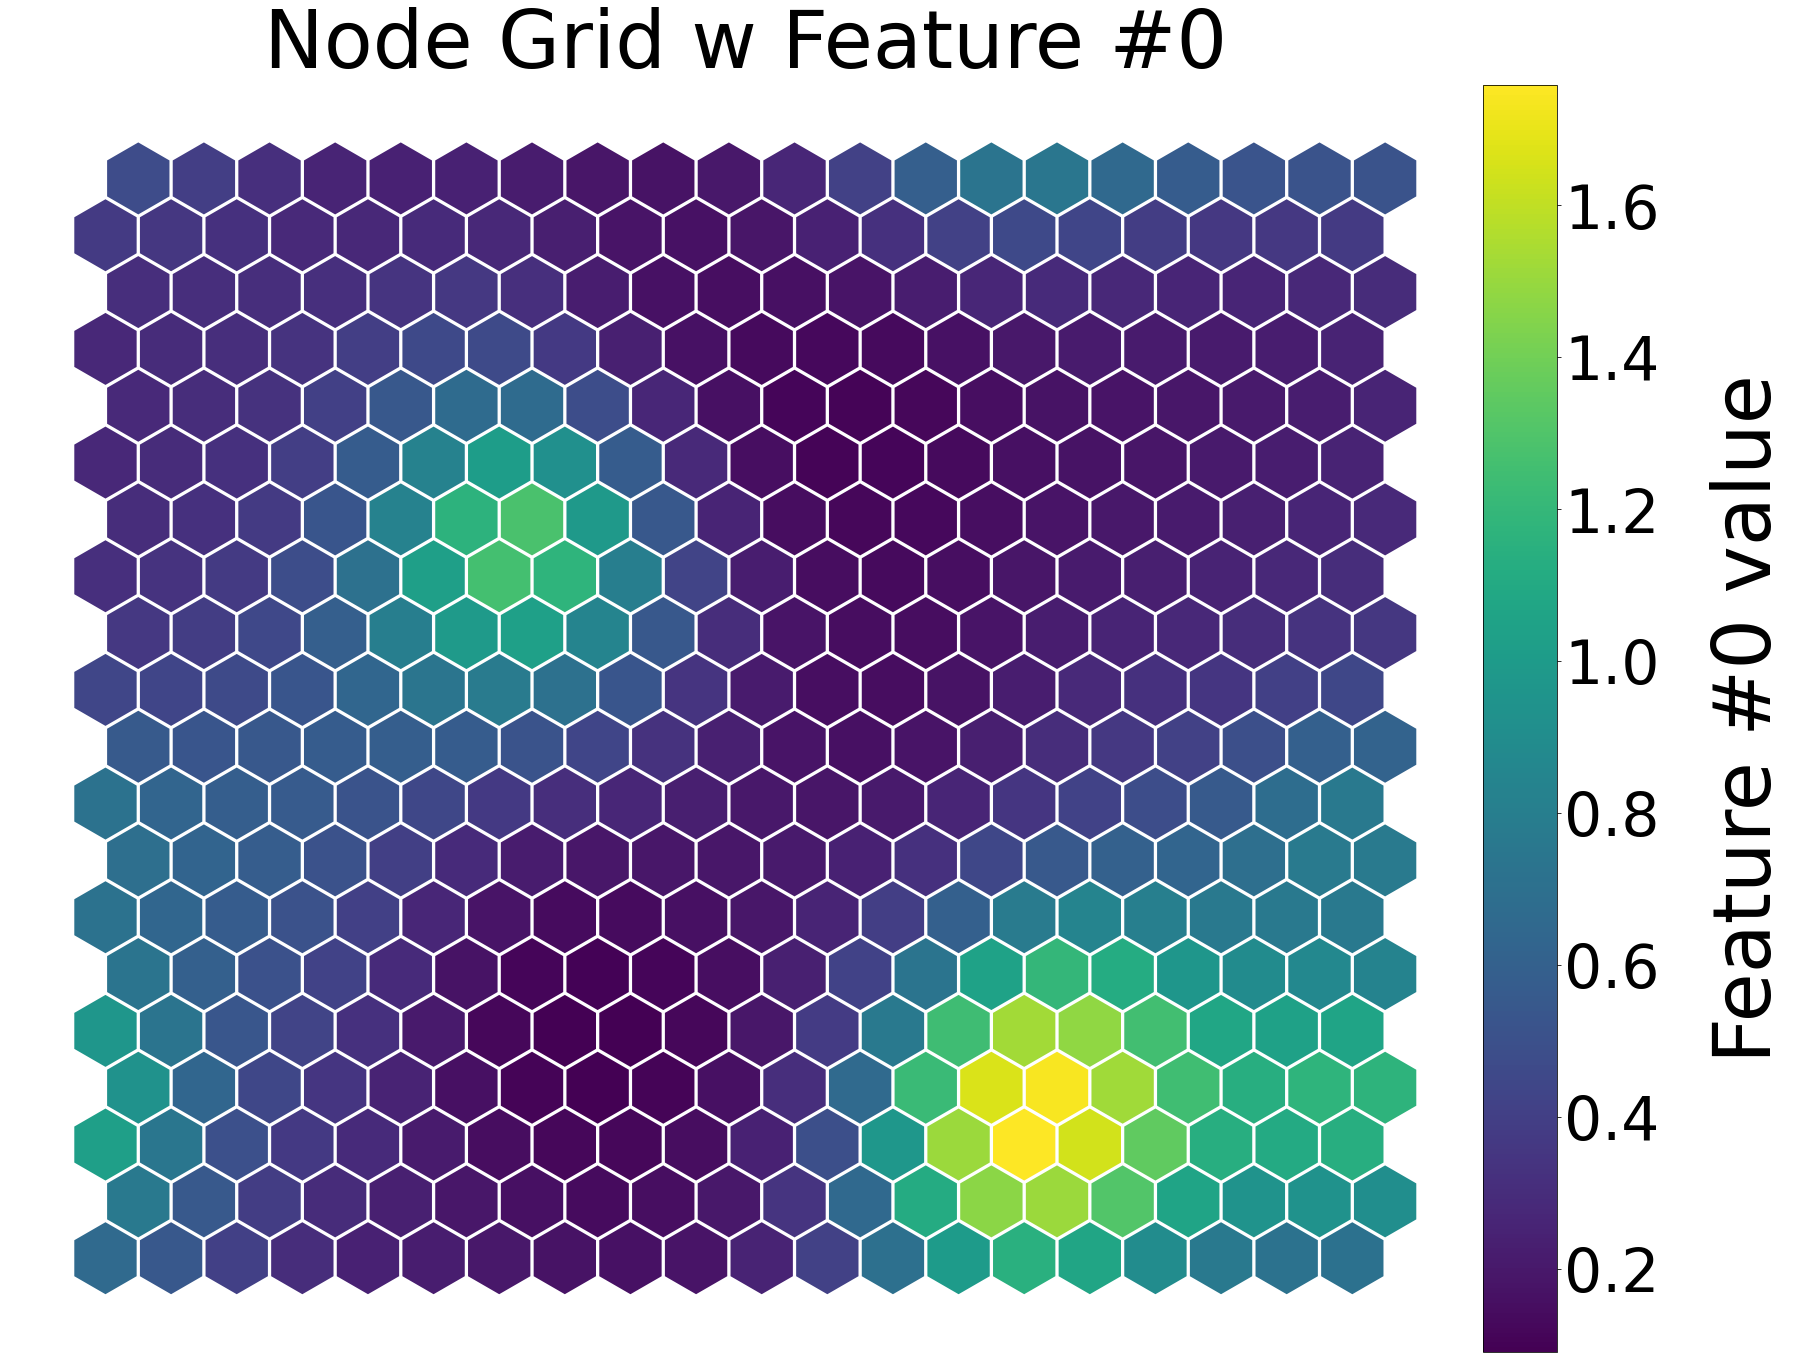

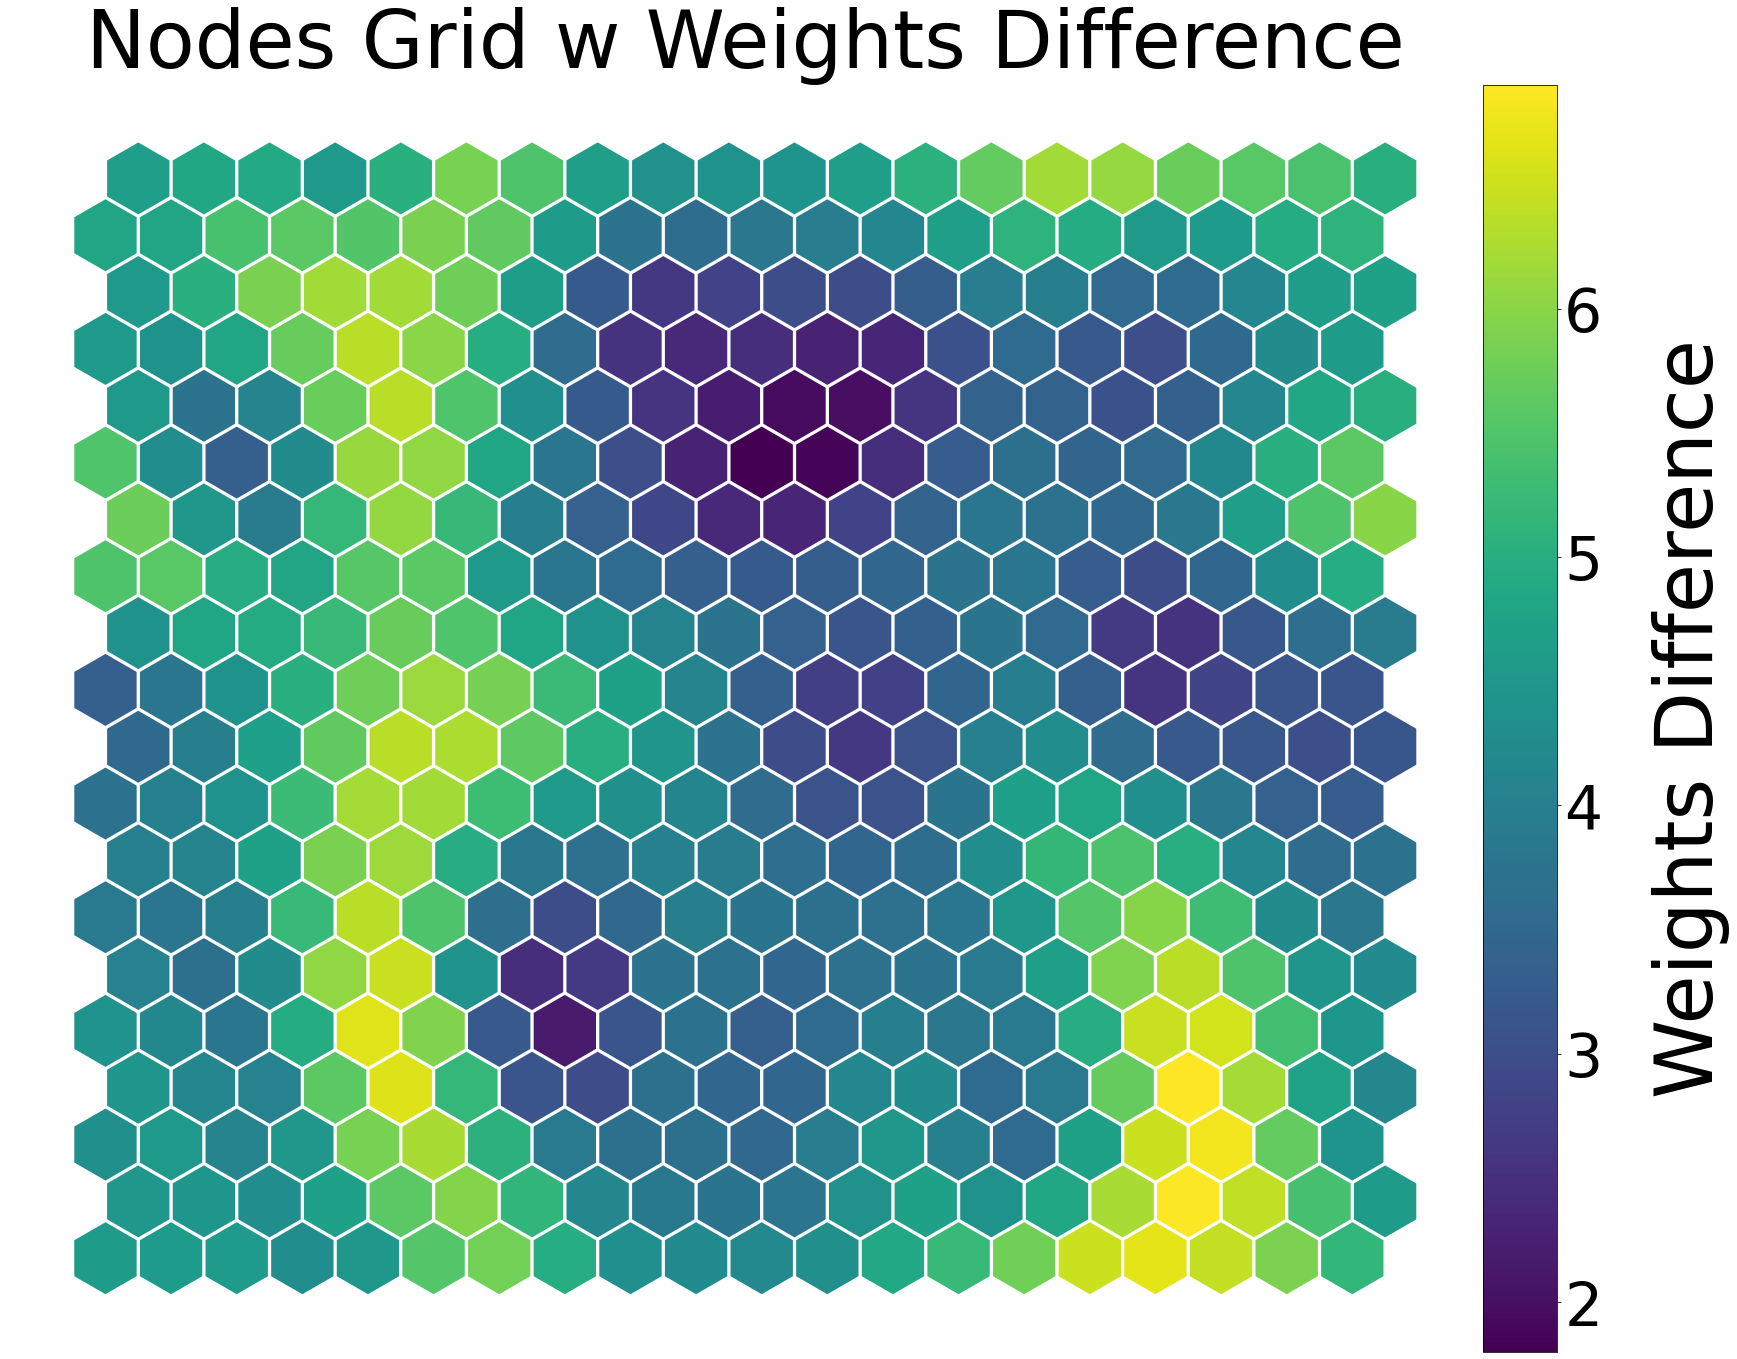

In [ ]:
net.save("filename_weights")
net.nodes_graph(colnum=0) 
net.diff_graph()

In [ ]:
net.project(som_data)

[[16, 8.660254037844387],
 [14, 3.4641016151377553],
 [10.5, 0.8660254037844388],
 [7, 3.4641016151377553],
 [0.5, 9.526279441628825],
 [19, 6.9282032302755105],
 [8.5, 12.99038105676658],
 [13.5, 2.598076211353316],
 [16, 8.660254037844387],
 [19.5, 2.598076211353316],
 [18.5, 7.794228634059948],
 [19, 5.196152422706632],
 [12, 13.856406460551021],
 [10.5, 4.330127018922194],
 [18.5, 9.526279441628825],
 [3.5, 16.454482671904337],
 [1, 13.856406460551021],
 [10.5, 6.062177826491071],
 [8, 1.7320508075688776],
 [11, 8.660254037844387],
 [0, 8.660254037844387],
 [8.5, 14.722431864335457],
 [0, 0.0],
 [19, 13.856406460551021],
 [12, 6.9282032302755105],
 [8, 0.0],
 [7, 3.4641016151377553],
 [2, 12.124355652982143],
 [10, 12.124355652982143],
 [10, 12.124355652982143],
 [10, 3.4641016151377553],
 [1.5, 4.330127018922194],
 [0, 5.196152422706632],
 [5.5, 12.99038105676658],
 [17, 13.856406460551021],
 [7, 3.4641016151377553],
 [13, 5.196152422706632],
 [1.5, 12.99038105676658],
 [1, 15.588

<Figure size 432x288 with 0 Axes>

In [ ]:
net.cluster(som_data, type="qthresh")

[[1, 2, 3, 7, 13, 17, 18, 19, 24, 25, 26, 30, 35, 36, 42, 47, 48, 49, 53, 54],
 [0, 4, 5, 8, 10, 11, 14, 20, 23, 27, 32, 34, 37, 39, 46, 51, 55],
 [6, 15, 16, 21, 28, 29, 33, 41, 43, 44, 56],
 [9, 22, 31, 38, 40, 50],
 [12, 45, 52]]

<Figure size 432x288 with 0 Axes>